# IMPACT OF VACCINES AGAINST COVID-19

## 1. Introduction
COVID-19, also known as the coronavirus disease, is a global pandemic that has affected the lives of millions of people around the world. It is caused by the SARS-CoV-2 virus, which is a highly contagious respiratory illness that can lead to severe illness or death.In this project, we will use Jupyter notebooks to analyze global  COVID-19 data, visualize trends and patterns, and analyze the impact of vaccines towards curbing the spread of the virus. Specifically we will: 

- Carry out Exploratory Data Analysis to explore the trends in terms of cases, deaths and vaccines
- Carry out Bivariate analysis between different vaccine data against  covide deaths and cases
- Perform different statistical test to analyze including t-test and regression analysis 

The data  for this project is obtained from  our world in data at :https://ourworldindata.org/policy-responses-covid


## 2. Importing python libraries  and  setting up  the notebook 
We will begin by importing the necessary libraries . The analysis will mainly use pandas libraries with matplotlib,  seaborn  a for visualization.  We will also need the sklearn and scipy libraries for statistical analysis and modelling 

In [160]:
#Dataframe library
import pandas as pd

#numerical  analysis
import numpy as np

#basic visualization
import matplotlib.pyplot as plt

#advanced visualization
import seaborn as sns

#test of means
from scipy.stats import ttest_ind

#linear modelling
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# hide warnings
import warnings
warnings.filterwarnings('ignore')

#directory changes
import os

In [199]:
# seaborn plot style
sns.set_style('darkgrid')

## 3.  Loading, cleaning and transforming the data

We will then proceed to load the csv file.The next step will be undertanding our dataset. This will include checking the shape (number of rows and columns), data types, missing values and any incosistencies . This project will only focus on aggregatedd global data from csv. Further we will also only focus on data that pertains covid cases , deaths and vaccines  thus filtering out the rest.

In [163]:
#Changing the directory
os.chdir('C:/Users/ELITEBOOK COI5/Desktop/Michael Work/Coding & Programming/Public Data/covid -19')

#loading our data
covid_data=pd.read_csv('owid-covid-data.csv')

#confirming the  data has been  loaded into the data sheet
covid_data.head()


,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-02-24,5.0,5.0,NaN,NaN,NaN,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-02-25,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-02-26,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-02-27,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-02-28,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN


In [164]:
#selecting only  global data from the  location field

covid_data_global=covid_data[covid_data['location']=='World']
covid_data_global.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
240767,OWID_WRL,NaN,World,2020-01-22,557.0,0.0,NaN,17.0,0.0,NaN,...,34.635,60.13,2.705,72.58,0.737,7.975105e+09,NaN,NaN,NaN,NaN
240768,OWID_WRL,NaN,World,2020-01-23,657.0,100.0,NaN,18.0,1.0,NaN,...,34.635,60.13,2.705,72.58,0.737,7.975105e+09,NaN,NaN,NaN,NaN
240769,OWID_WRL,NaN,World,2020-01-24,944.0,287.0,NaN,26.0,8.0,NaN,...,34.635,60.13,2.705,72.58,0.737,7.975105e+09,NaN,NaN,NaN,NaN
240770,OWID_WRL,NaN,World,2020-01-25,1437.0,493.0,NaN,42.0,16.0,NaN,...,34.635,60.13,2.705,72.58,0.737,7.975105e+09,NaN,NaN,NaN,NaN
240771,OWID_WRL,NaN,World,2020-01-26,2120.0,683.0,NaN,56.0,14.0,NaN,...,34.635,60.13,2.705,72.58,0.737,7.975105e+09,NaN,NaN,NaN,NaN


In [165]:
#Selecting only the required columns (The datasheet contains 67 columns , we only select a few )

covid_data_global=covid_data_global[['date','total_cases', 'new_cases','total_deaths', 'new_deaths','total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate','total_vaccinations', 'people_vaccinated', 'people_fully_vaccinated', 'total_boosters',
       'new_vaccinations', 'new_vaccinations_smoothed', 'total_vaccinations_per_hundred', 'people_vaccinated_per_hundred', 'people_fully_vaccinated_per_hundred',
        'total_boosters_per_hundred', 'new_vaccinations_smoothed_per_million',  'new_people_vaccinated_smoothed', 'new_people_vaccinated_smoothed_per_hundred',]]

In [166]:
covid_data_global.head()

,date,total_cases,new_cases,total_deaths,new_deaths,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,total_vaccinations,...,total_boosters,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,total_boosters_per_hundred,new_vaccinations_smoothed_per_million,new_people_vaccinated_smoothed,new_people_vaccinated_smoothed_per_hundred
240767,2020-01-22,557.0,0.0,17.0,0.0,0.002,0.000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
240768,2020-01-23,657.0,100.0,18.0,1.0,0.002,0.000,NaN,3.18,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
240769,2020-01-24,944.0,287.0,26.0,8.0,0.003,0.001,NaN,3.33,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
240770,2020-01-25,1437.0,493.0,42.0,16.0,0.005,0.002,NaN,3.48,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
240771,2020-01-26,2120.0,683.0,56.0,14.0,0.007,0.002,NaN,3.54,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [167]:
#filling all the NaN (Null values) with zeros

covid_data_global=covid_data_global.fillna(0)
covid_data_global.head()

,date,total_cases,new_cases,total_deaths,new_deaths,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,total_vaccinations,...,total_boosters,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,total_boosters_per_hundred,new_vaccinations_smoothed_per_million,new_people_vaccinated_smoothed,new_people_vaccinated_smoothed_per_hundred
240767,2020-01-22,557.0,0.0,17.0,0.0,0.002,0.000,0.0,0.00,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
240768,2020-01-23,657.0,100.0,18.0,1.0,0.002,0.000,0.0,3.18,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
240769,2020-01-24,944.0,287.0,26.0,8.0,0.003,0.001,0.0,3.33,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
240770,2020-01-25,1437.0,493.0,42.0,16.0,0.005,0.002,0.0,3.48,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
240771,2020-01-26,2120.0,683.0,56.0,14.0,0.007,0.002,0.0,3.54,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [168]:
#Converting   the date  column from object  to date
covid_data_global['date']=pd.to_datetime(covid_data_global['date'])

In [169]:
#Extracting  month and year from date
covid_data_global['Year'] = covid_data_global['date'].dt.year
covid_data_global['Month'] = covid_data_global['date'].dt.month_name()

In [170]:
covid_data_global.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1067 entries, 240767 to 241833
Data columns (total 24 columns):
 #   Column                                      Non-Null Count  Dtype         
---  ------                                      --------------  -----         
 0   date                                        1067 non-null   datetime64[ns]
 1   total_cases                                 1067 non-null   float64       
 2   new_cases                                   1067 non-null   float64       
 3   total_deaths                                1067 non-null   float64       
 4   new_deaths                                  1067 non-null   float64       
 5   total_deaths_per_million                    1067 non-null   float64       
 6   new_deaths_per_million                      1067 non-null   float64       
 7   new_deaths_smoothed_per_million             1067 non-null   float64       
 8   reproduction_rate                           1067 non-null   float64       
 9   t

### 4. EXPLORATORY DATA ANALYSIS

Exploratory data analysis (EDA) is a crucial step in the data analysis process that involves examining and summarizing the main characteristics of a dataset. By performing EDA, we can identify patterns, trends, and relationships within the data, as well as detect any anomalies or inconsistencies that may require further investigation. In this project, we will utilize EDA techniques such as line and bar graphs to explore the trend of COVID-19 transmission and vaccine impact. Additionally, we will conduct correlation analysis to determine the nature of relationships between various variables and gain a better understanding of the spread and transmission of the virus. Through EDA, we aim to gain a comprehensive understanding of the COVID-19 pandemic and the impact of vaccines on its spread. 

In [180]:
#This function plots a simple line graph
def line_plot(df, x_col, y_col):
    plt.figure(figsize=(15,8))
    sns.lineplot(data=df, x=x_col, y=y_col)
    plt.show()
    

In [200]:
#This functions  plots a simple bar plot
def bar_plot(df, x_col, y_col):
    plt.figure(figsize=(15,8))
    sns.barplot( x = x_col,
             y = y_col,
             data = df,
              palette = "Blues")
    
    plt.show()

In [173]:
# This function creates a scatter plot
def scatter_plot(df, x_col, y_col):
    plt.figure(figsize=(15,8))
    sns.scatterplot(data=df, x=x_col, y=y_col)
    plt.show()

### Cumulative Cases and Deaths

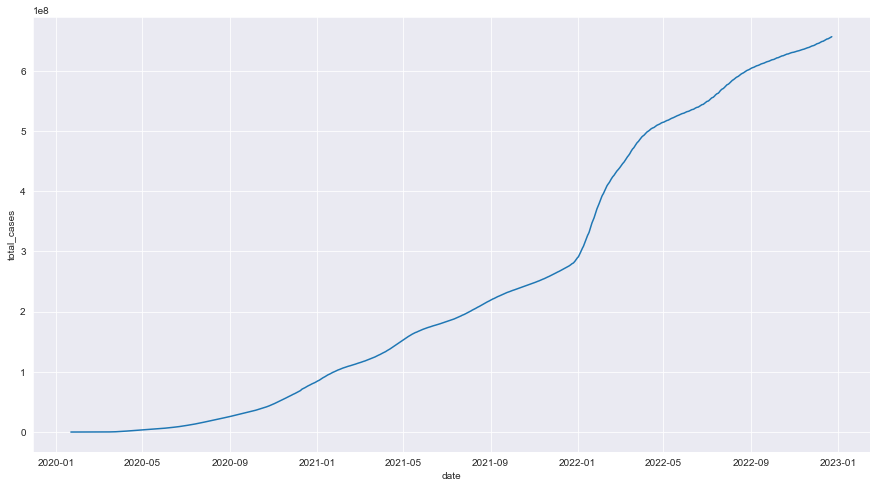

In [181]:
# Global cases 
line_plot(covid_data_global, 'date', 'total_cases')

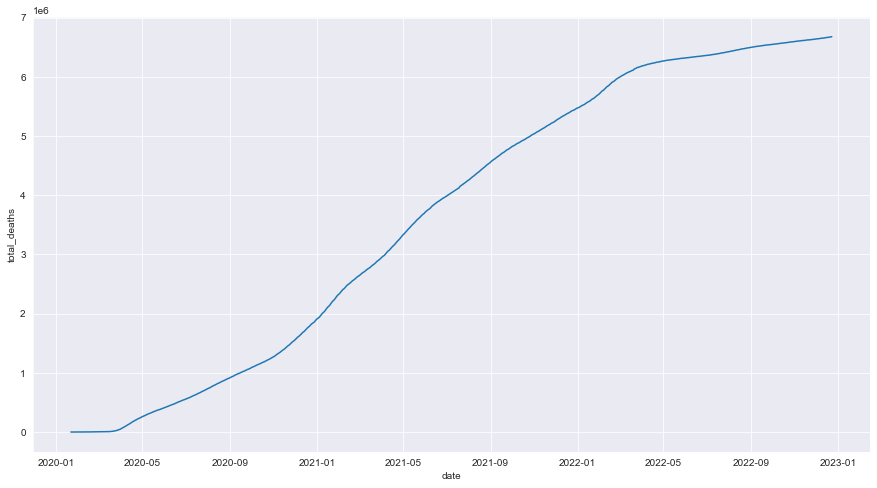

In [182]:
#global_deaths
line_plot(covid_data_global, 'date', 'total_deaths')

### Daily Cases and Deaths

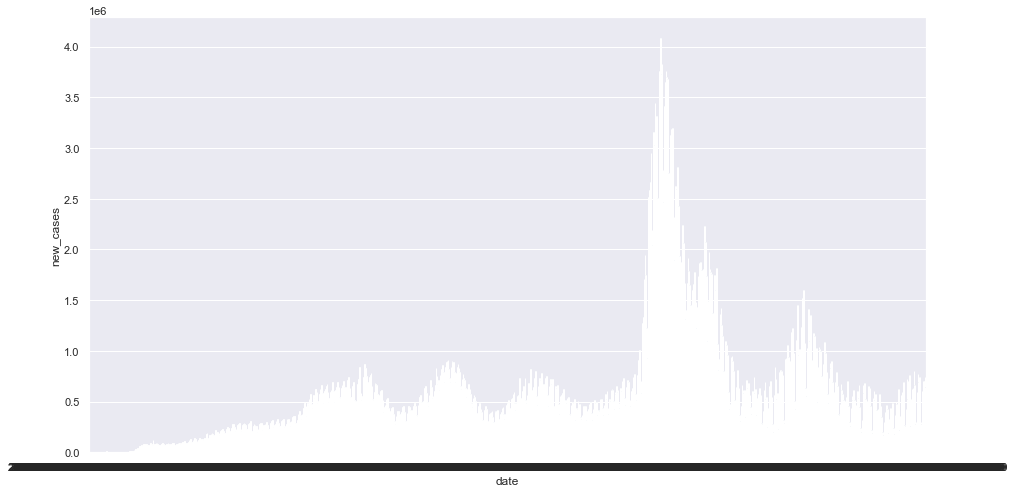

In [201]:
#Daily cases
bar_plot(covid_data_global, 'date', 'new_cases')

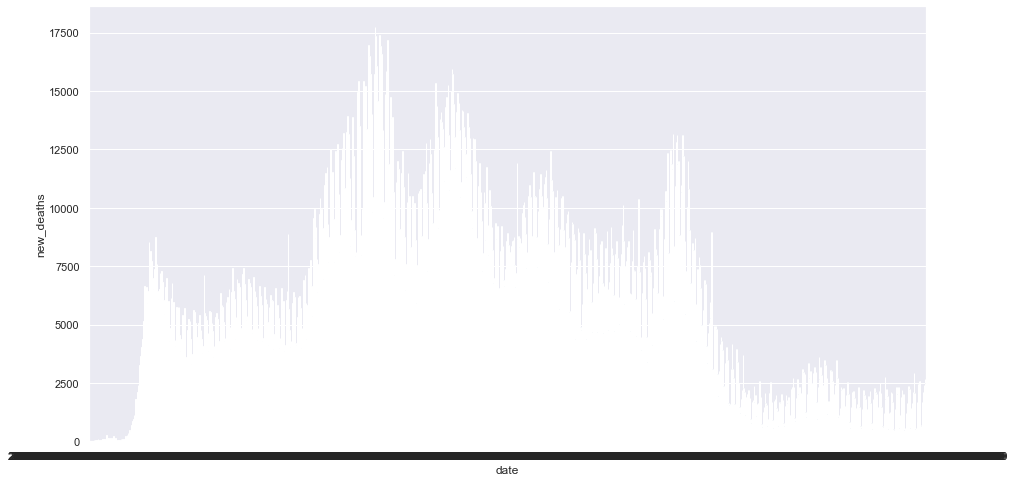

In [202]:
#Daily deaths
bar_plot(covid_data_global, 'date', 'new_deaths')

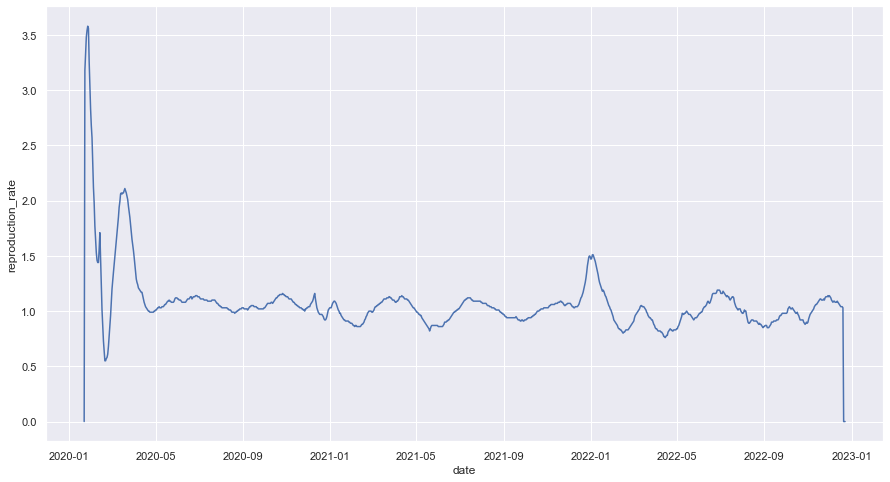

In [203]:
#reproduction_rate 
line_plot(covid_data_global, 'date', 'reproduction_rate')

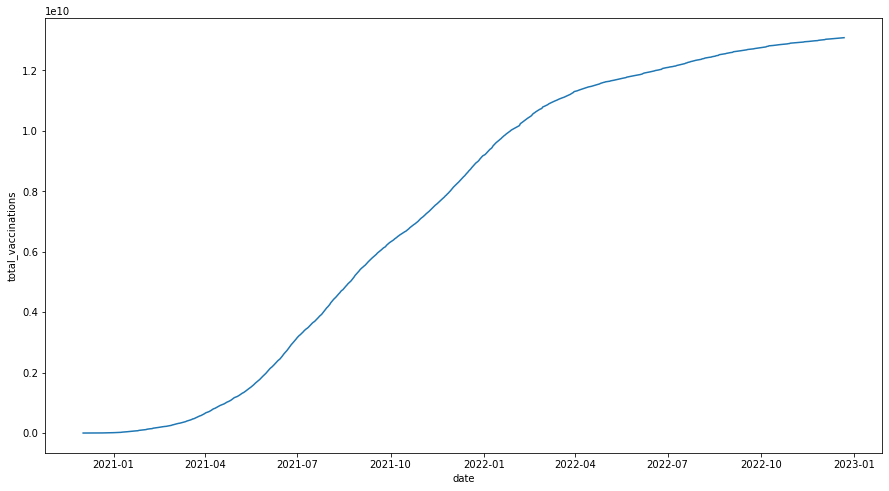

In [22]:
#total_vaccinations
line_plot(covid_data_global, 'date', 'total_vaccinations')

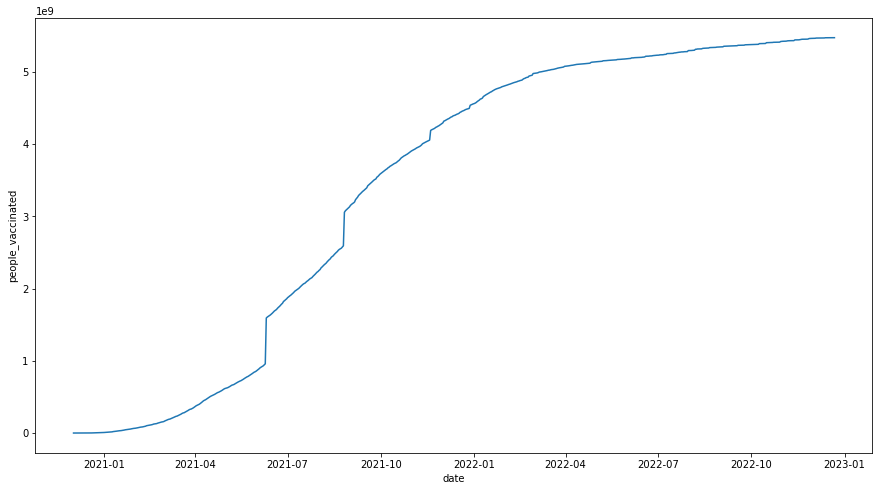

In [26]:
line_plot(covid_data_global, 'date', 'people_vaccinated')


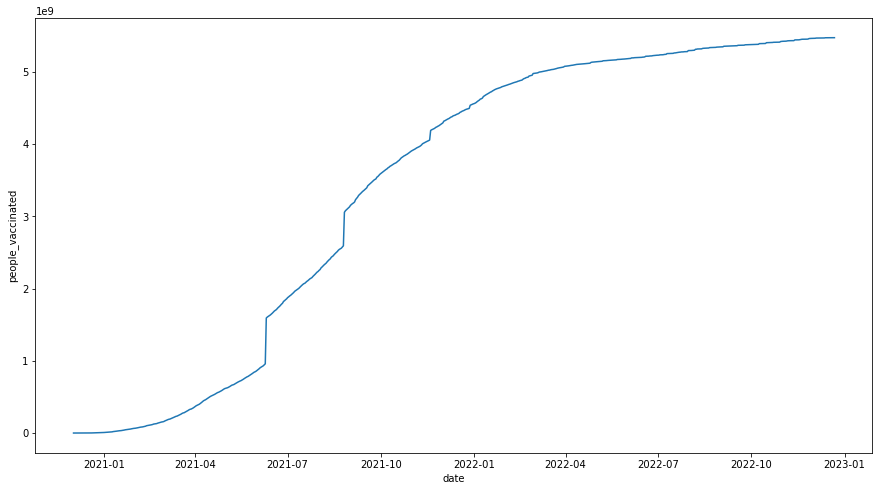

In [28]:
line_plot(covid_data_global, 'date', 'people_vaccinated')

In [82]:
conditions= [covid_data_global['new_vaccinations']== 0,
            covid_data_global['new_vaccinations']>=1]
values=[0,1]
covid_data_global['vaccination']=np.select(conditions, values)


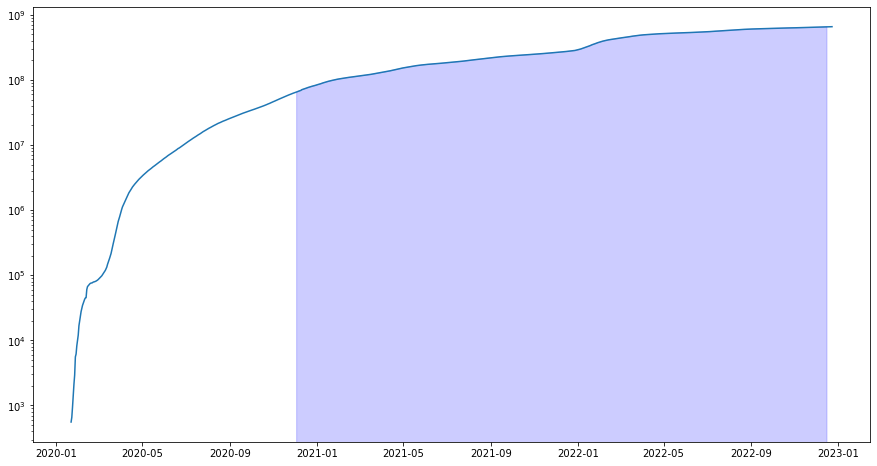

In [84]:
plt.figure(figsize=(15,8))
plt.plot( covid_data_global['date'], covid_data_global['total_cases'])
plt.fill_between(covid_data_global["date"], covid_data_global['total_cases'],where=covid_data_global["vaccination"]==1, color="blue", alpha=0.2)
plt.yscale('log')

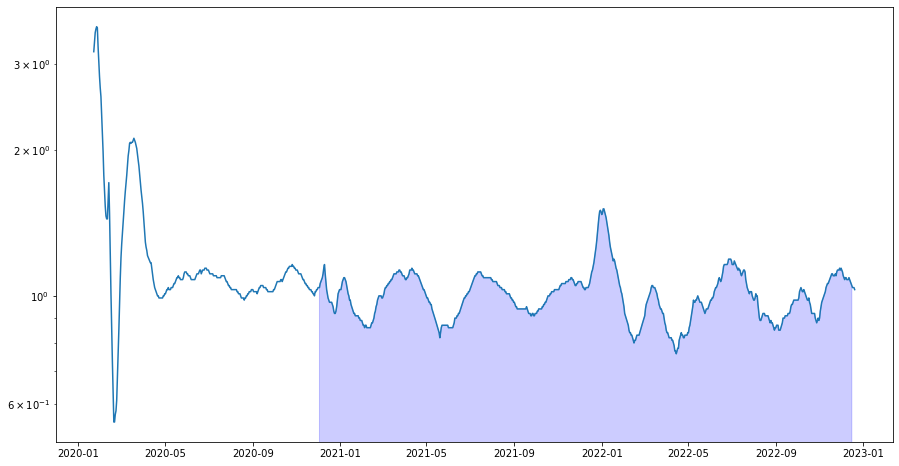

In [85]:
plt.figure(figsize=(15,8))
plt.plot( covid_data_global['date'], covid_data_global['reproduction_rate'])
plt.fill_between(covid_data_global["date"], covid_data_global['reproduction_rate'],where=covid_data_global["vaccination"]==1, color="blue", alpha=0.2)
plt.yscale('log')

In [89]:
covid_data_global['case_pct_change']=covid_data_global['total_cases'].pct_change()


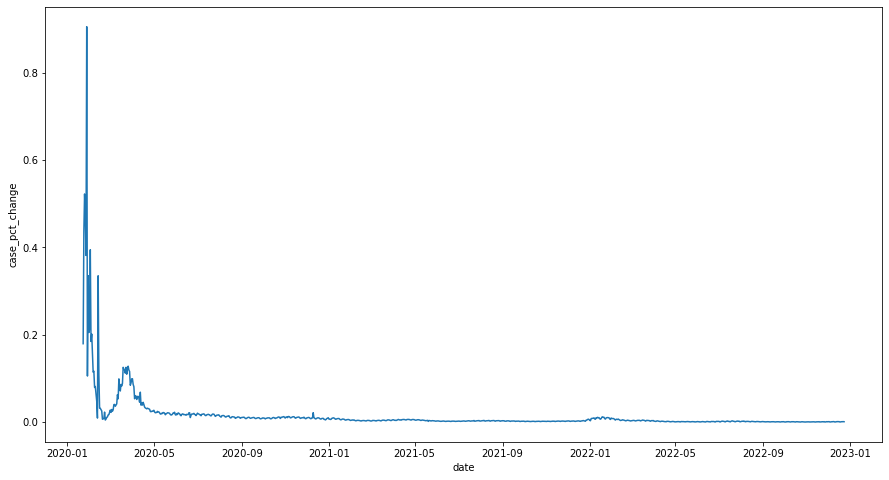

In [91]:
line_plot(covid_data_global, 'date', 'case_pct_change')

In [92]:
covid_data_global['death_pct_change']=covid_data_global['total_deaths'].pct_change()

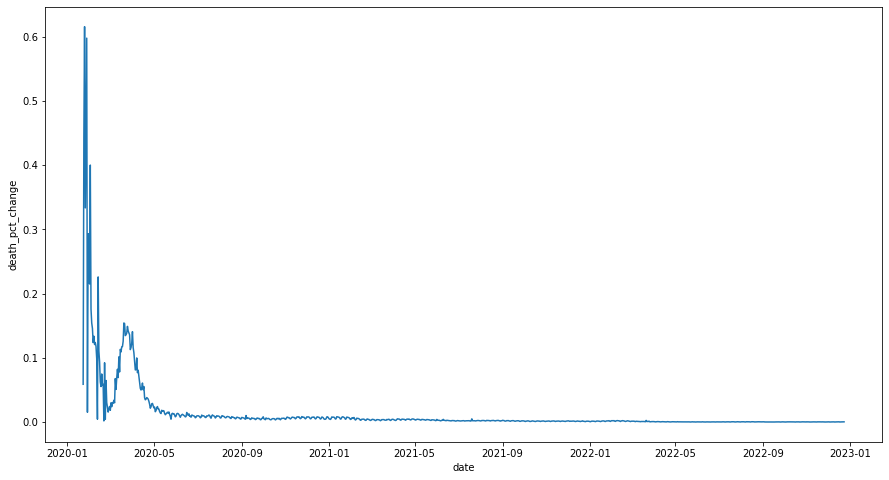

In [93]:
line_plot(covid_data_global, 'date', 'death_pct_change')

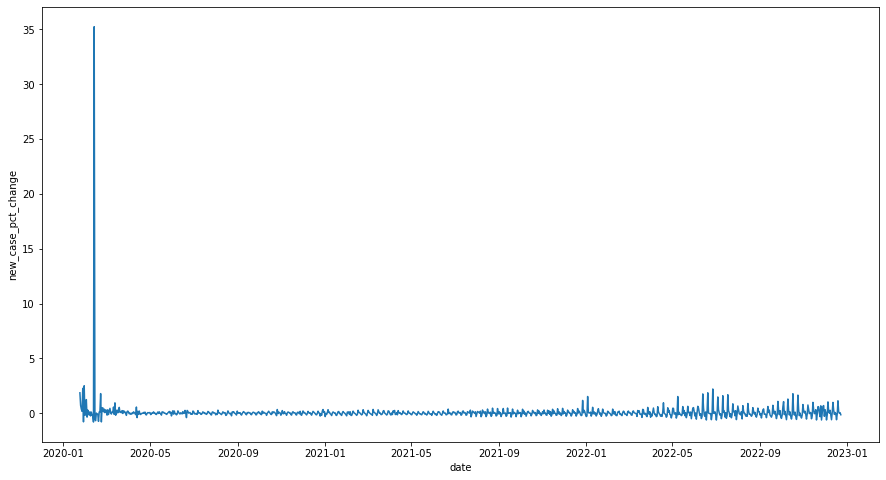

In [94]:
covid_data_global['new_case_pct_change']=covid_data_global['new_cases'].pct_change()
line_plot(covid_data_global, 'date', 'new_case_pct_change')

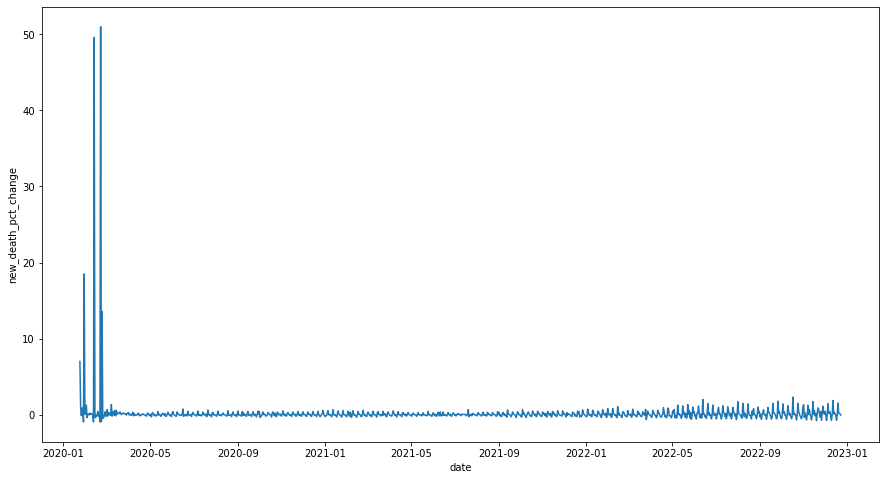

In [95]:
covid_data_global['new_death_pct_change']=covid_data_global['new_deaths'].pct_change()
line_plot(covid_data_global, 'date', 'new_death_pct_change')

### Bivariate Analysis

In [38]:
#scatterplot
def scatter_plot(df, x_col, y_col):
    plt.figure(figsize=(15,8))
    sns.scatterplot(data=df, x=x_col, y=y_col)
    plt.show()

### correlation

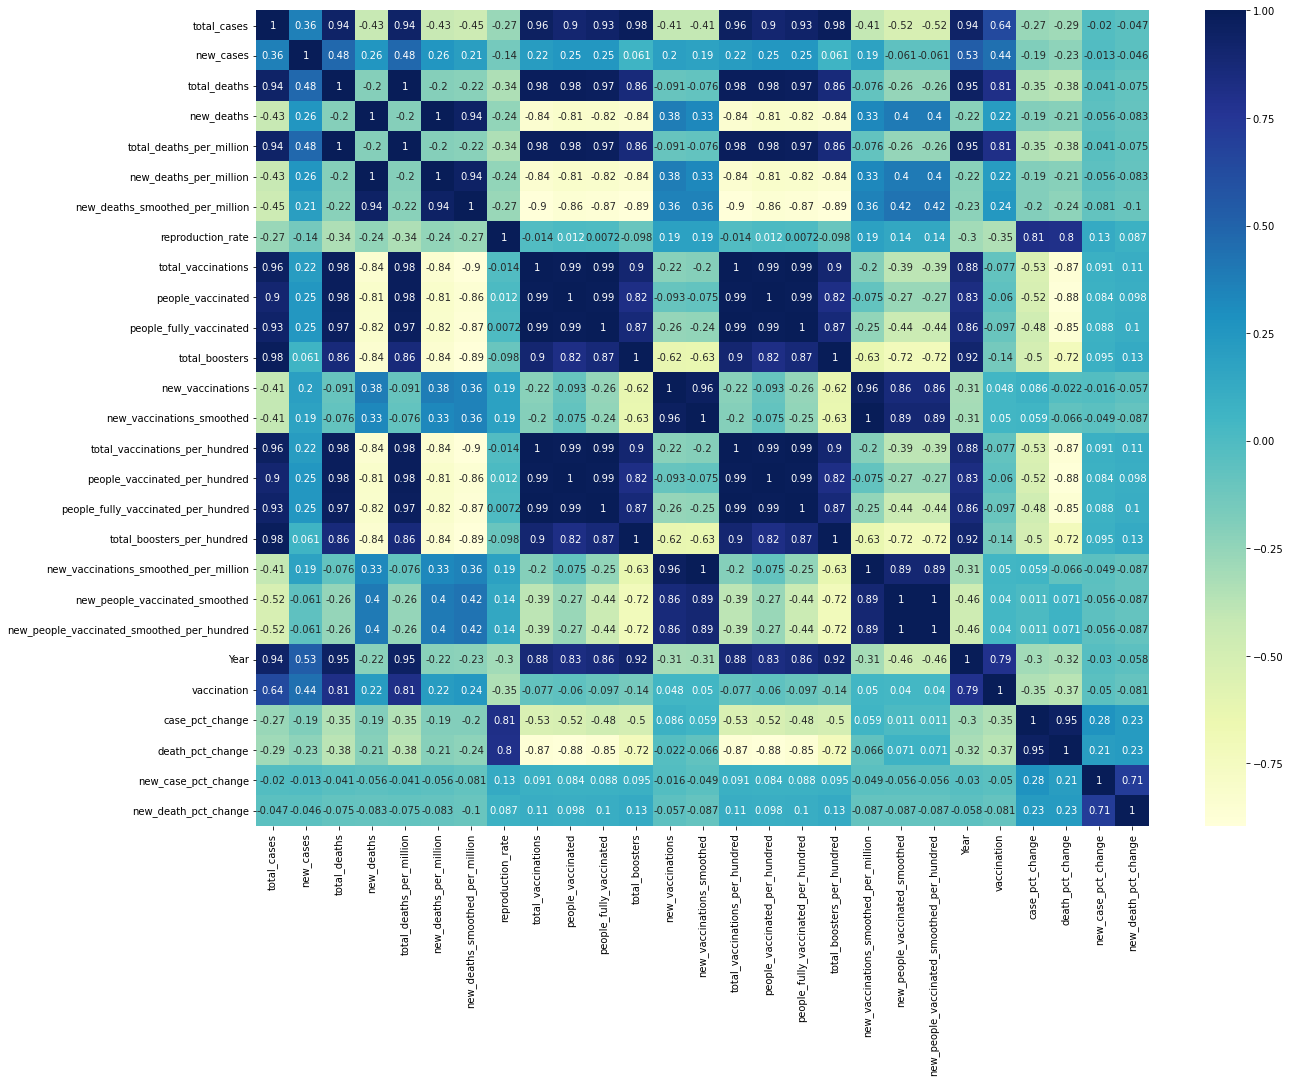

In [97]:
#Creating a correlation heatmap

corr_matrix=covid_data_global.corr()
plt.figure(figsize=(20,15))
sns.heatmap(corr_matrix, cmap="YlGnBu", annot=True)
plt.show()

From the above correlation matrix we are going to focus on the following variables:
- total_cases
- new_cases
- total_deaths
- reproduction_rate
- total_vaccinaions
- new_vaccinations
- people_vaccinated
- people_fully_vaccinated
- total_boosters


In [99]:
covid_data_global_analysis=covid_data_global[['total_cases', 'new_cases','total_deaths','new_deaths', 'reproduction_rate', 'total_vaccinations',
                                             'new_vaccinations', 'people_vaccinated', 'people_fully_vaccinated','total_boosters', 
                                              'case_pct_change', 'death_pct_change','new_case_pct_change', 'new_death_pct_change', 'vaccination'
                                                 ]]

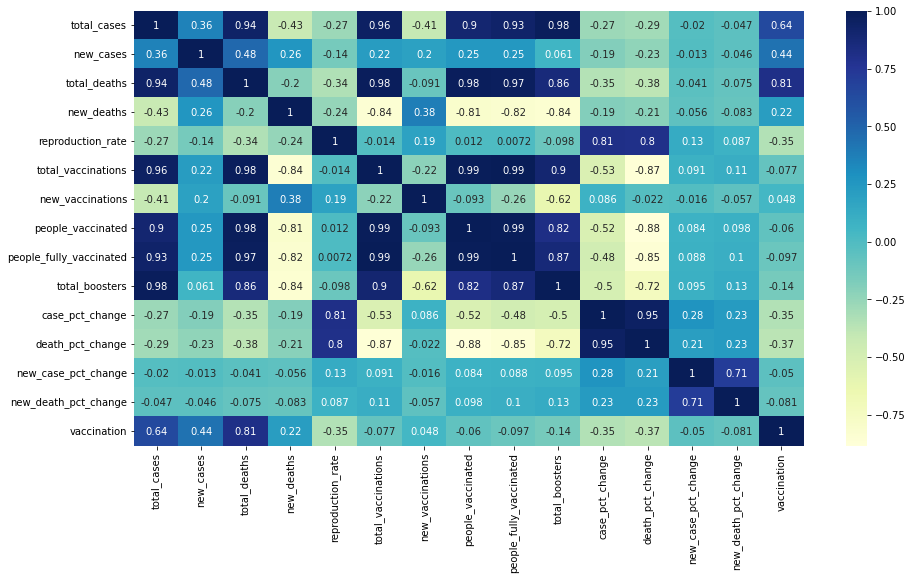

In [100]:
#correlation matrix
corr_matrix2= covid_data_global_analysis.corr()

#heatmap
plt.figure(figsize=(15,8))
sns.heatmap(corr_matrix2, cmap="YlGnBu", annot=True)


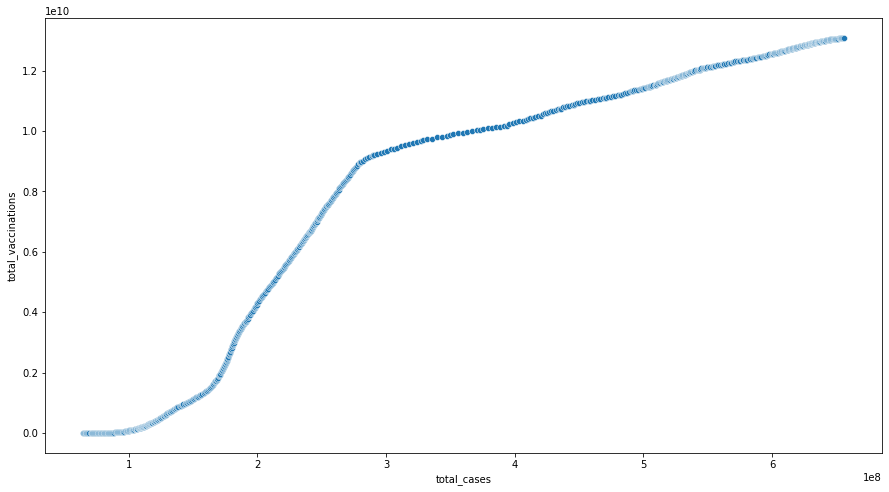

In [101]:
#scatterplot
scatter_plot(covid_data_global_analysis, 'total_cases', 'total_vaccinations')

In [76]:
x = np.log(covid_data_global_analysis['total_cases'], dtype='float64')
y = np.log(covid_data_global_analysis['new_vaccinations'], dtype='float64')


c:\users\elitebook coi5\appdata\local\programs\python\python37\lib\site-packages\pandas\core\series.py:679: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


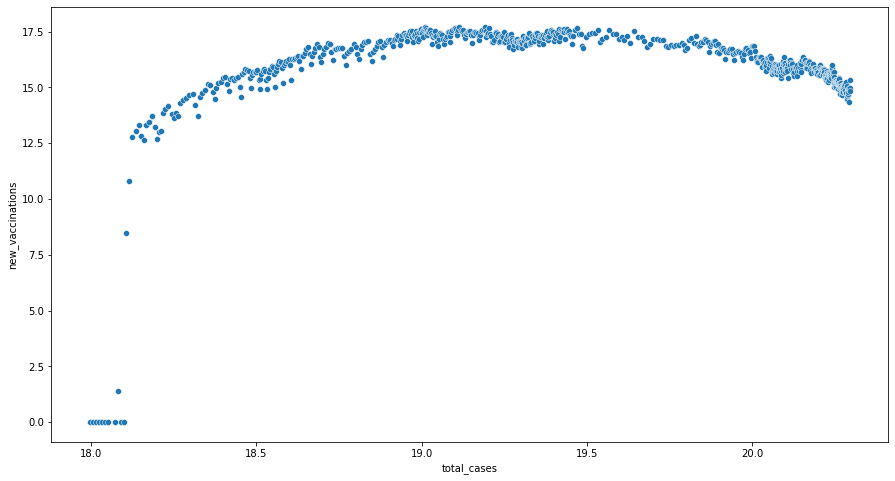

In [77]:
scatter_plot(covid_data_global_analysis, x, y)

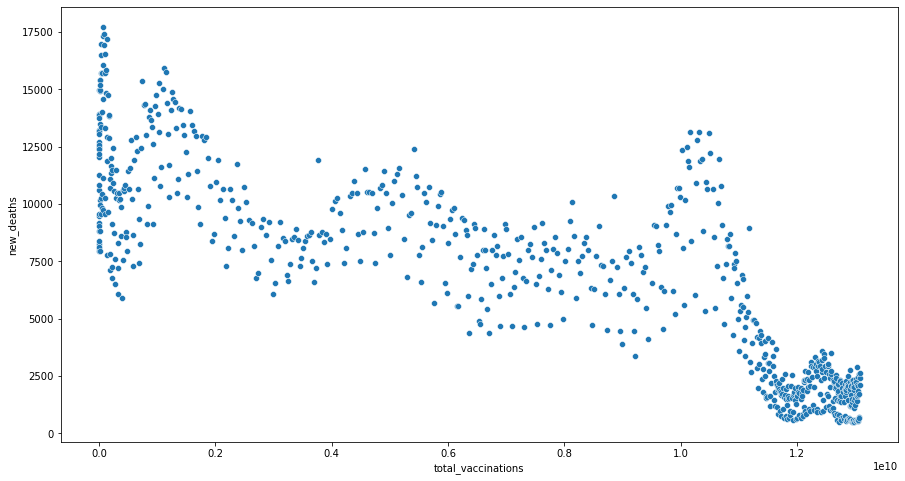

In [69]:
scatter_plot(covid_data_global_analysis, 'total_vaccinations','new_deaths')

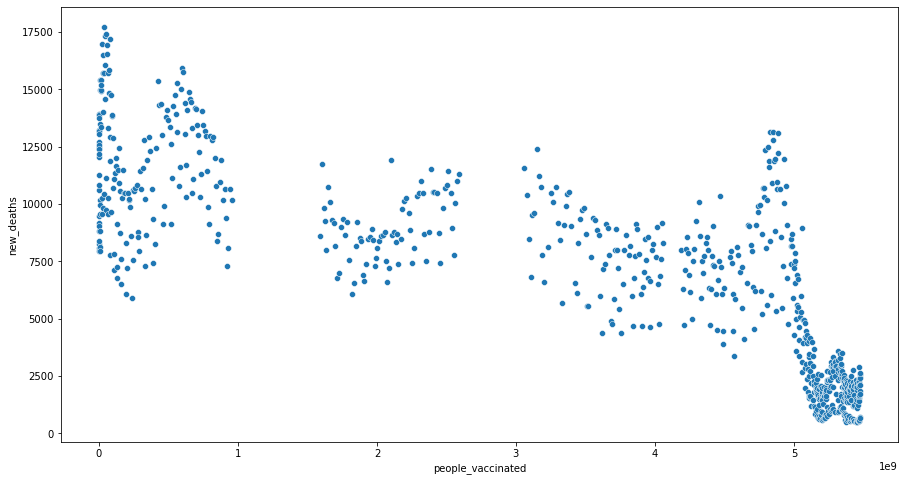

In [70]:
scatter_plot(covid_data_global_analysis, 'people_vaccinated','new_deaths')

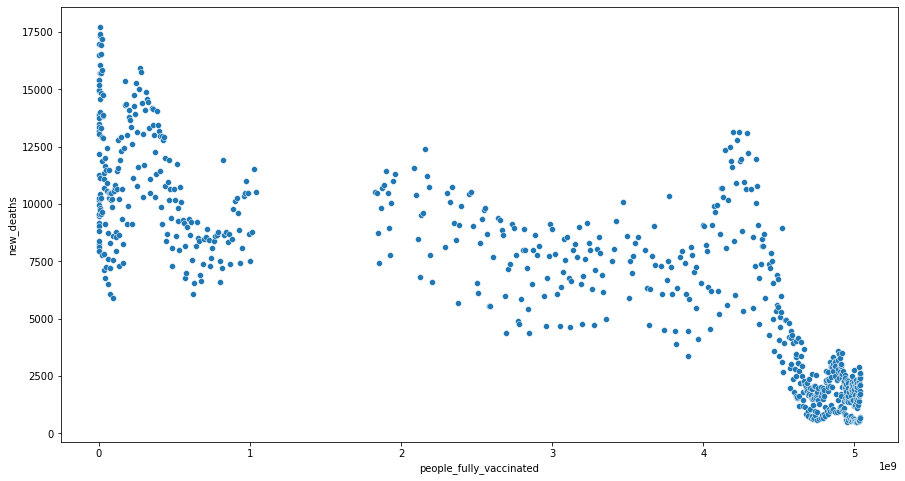

In [71]:
scatter_plot(covid_data_global_analysis, 'people_fully_vaccinated','new_deaths')

c:\users\elitebook coi5\appdata\local\programs\python\python37\lib\site-packages\pandas\core\series.py:679: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


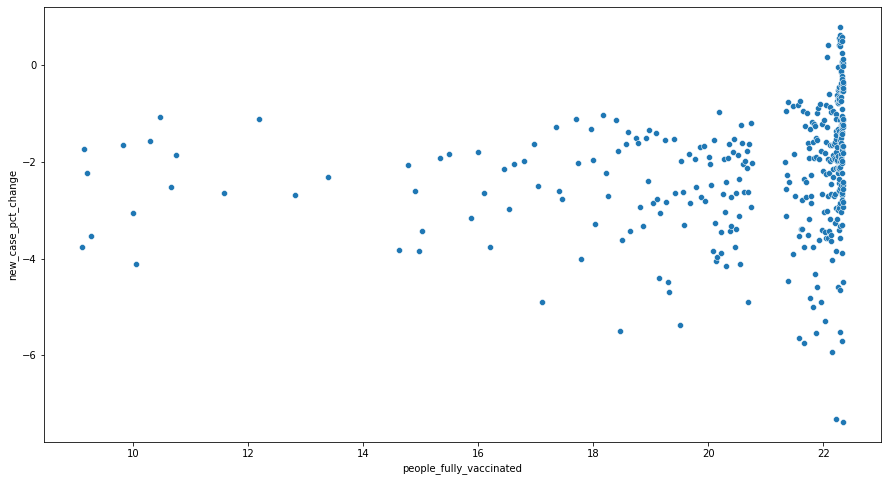

In [104]:
y = np.log(covid_data_global_analysis['new_case_pct_change'], dtype='float64')
x = np.log(covid_data_global_analysis['people_fully_vaccinated'], dtype='float64')

scatter_plot(covid_data_global_analysis, x, y)

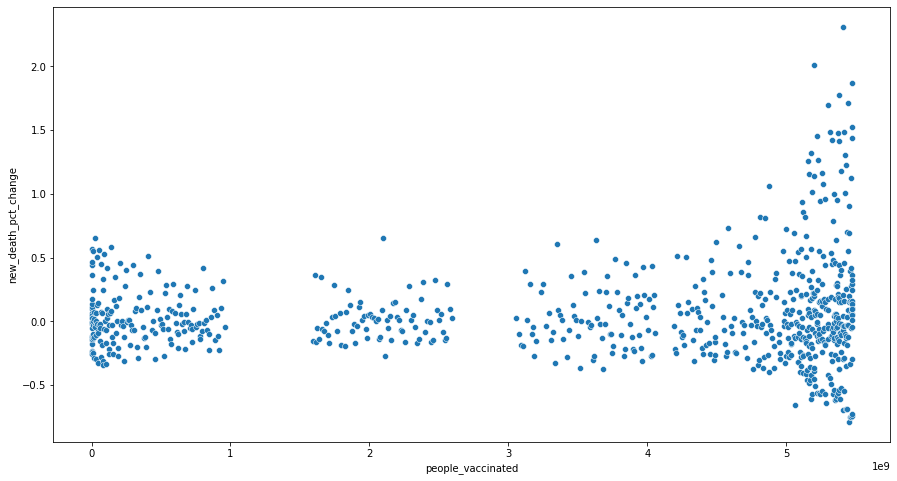

In [106]:
scatter_plot(covid_data_global_analysis, 'people_vaccinated','new_death_pct_change')

## Inferential Analysis

In [107]:
from scipy.stats import ttest_ind

In [110]:
group_A=covid_data_global_analysis[covid_data_global_analysis['vaccination']==0]
group_B=covid_data_global_analysis[covid_data_global_analysis['vaccination']==1]

In [111]:
#testing whether there was a change in new deaths before and after beginning of vaccination
ttest_ind(group_A['new_deaths'], group_B['new_deaths'])

Ttest_indResult(statistic=-7.300188250819577, pvalue=5.612803180151069e-13)

significant difference found

In [113]:
#testing whether there was a change in new cases before and after beginning of vaccination
ttest_ind(group_A['new_cases'], group_B['new_cases'])

Ttest_indResult(statistic=-15.990920471257425, pvalue=9.479509569697925e-52)

Significant difference found

### Predicting new deaths and  new cases using the above variables

In [135]:
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [143]:
from sklearn.linear_model import LinearRegression

In [150]:
#Selecting predictor variables 

X =covid_data_global_analysis[['total_cases', 'new_cases',  'total_vaccinations', 
        'new_vaccinations', 'people_vaccinated', 'people_fully_vaccinated', 'total_boosters', 'vaccination']]
# Select the column that will be the dependent variable
y=covid_data_global_analysis['new_deaths']


In [151]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [152]:
# Standardize the training and test sets
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [153]:
# Fit the multiple linear regression model to the training data
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [154]:
# Use the model to make predictions about the number of new deaths on the test data
predictions = regressor.predict(X_test)

In [155]:
# Calculate the mean squared error of the predictions
mse = ((predictions - y_test) ** 2).mean()

# Print the mean squared error
print(mse)

4087292.5531609766


In [157]:
from sklearn.metrics import r2_score

In [158]:
r2 = r2_score(y_test, predictions)

# Print the R-squared score
print(r2)

0.7461643976579444


In [142]:
# Calculate the mean squared error of the predictions
mse = ((predictions - y_test) ** 2).mean()

# Print the mean squared error
print(mse)

3513321.451221993
